## Tarea Práctica 1: Gradient descent con TensorFlow
#### Statistical Learning I
##### Ruben Gonzalez 20003314

In [35]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.load("proyecto_training_data.npy")

In [5]:
import pandas as pd

In [7]:
pandas_dataframe = pd.DataFrame(data,columns=['SalePrice','OverallQual','1stFlrSF','TotRmsAbvGrd','YearBuilt','LotFrontage'])

In [8]:
pandas_dataframe.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [9]:
pandas_dataframe.corr()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGrd,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


Para el analisis solicitado se utlizara la variable independiente con mayor correlacion con respecto a SalePrice. En este caso OverallQual

In [15]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


In [27]:
def error(y_real,y_aprox):
  return 1/2*tf.reduce_mean(tf.math.square(y_real - y_aprox) )

In [31]:
class ModeloLineal:
  def __init__(self):
    tf.reset_default_graph()
    self.m = tf.get_variable("pendiente",dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())
    self.b = tf.get_variable("intercepto",dtype=tf.float32,shape=[],initializer=tf.zeros_initializer())

  def __call__(self,x):
    return self.m*x + self.b

  def actualizar(self,x,y,learning_rate):
    prediccion = self(x)
    error = 1/2*tf.reduce_mean(tf.math.square(y - prediccion) )
    gradiente = tf.gradients(error,[self.m,self.b])
    actualizacion_m = tf.assign(self.m, self.m - learning_rate*gradiente[0] )
    actualizacion_b = tf.assign(self.b, self.b - learning_rate*gradiente[1] )
    actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)

    return actualizacion_parametros

In [33]:
modelo = ModeloLineal()

learning_rate = 0.0001

tensor_x = tf.placeholder(tf.float32,[pandas_dataframe["OverallQual"].size],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[pandas_dataframe["SalePrice"].size],"tensor_y")

prediccion = modelo(tensor_x)
actualizacion_parametros = modelo.actualizar(tensor_x,tensor_y,learning_rate)

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


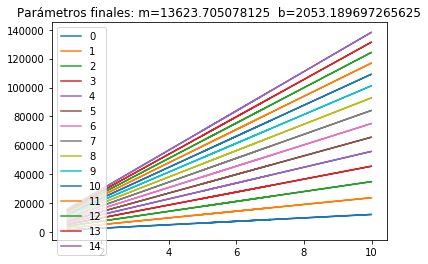

In [37]:
with tf.train.MonitoredSession() as session:
  feed_dict = {tensor_x:pandas_dataframe["OverallQual"], tensor_y:pandas_dataframe["SalePrice"]}

  for i in range(15):
    
    session.run(actualizacion_parametros,feed_dict=feed_dict)

    predicciones = session.run(prediccion,feed_dict=feed_dict)

    plt.plot(pandas_dataframe["OverallQual"],predicciones,label=str(i))

  pendiente_final,intercepto_final = session.run([modelo.m,modelo.b],feed_dict=feed_dict)
  plt.title("Parámetros finales: m={}  b={}".format(pendiente_final,intercepto_final))

plt.legend()
plt.show()

learning_rate = 0.001

m = tf.get_variable("pendiente",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())
b = tf.get_variable("intercepto",dtype=tf.float32, shape=[],
                    initializer=tf.zeros_initializer())

tensor_x = tf.placeholder(tf.float32,[pandas_dataframe["SalePrice"].size],"tensor_x")
tensor_y = tf.placeholder(tf.float32,[pandas_dataframe["OverallQual"].size],"tensor_y")

# hipotesis-modelo y = mx + b
prediccion = tf.add(tf.multiply(m,tensor_x),b)

# batch gradient descent
gradiente = tf.gradients(error(tensor_y,prediccion) ,[m,b] )


actualizacion_m = tf.assign(m, m - learning_rate*gradiente[0] )
actualizacion_b = tf.assign(b, b - learning_rate*gradiente[1] )
actualizacion_parametros = tf.group(actualizacion_m,actualizacion_b)

In [38]:
a=tf.constant([10])
b=tf.constant([20])
c=tf.add(a,b)

logs_dir='./events_logs_new'

In [39]:
with tf.Session() as sess:
    writer=tf.summary.FileWriter(logs_dir, sess.graph)
    result=sess.run(c)
    print('Outcome: ', result)
writer.close()

Outcome:  [30]


!tensorboard --logdir=event_logs_new --port 6006